In [1]:

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
CovidVacc = pd.read_csv('Desktop/country_vaccinations.csv')

In [3]:
CovidVacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15666 non-null  object 
 1   iso_code                             15666 non-null  object 
 2   date                                 15666 non-null  object 
 3   total_vaccinations                   9437 non-null   float64
 4   people_vaccinated                    8754 non-null   float64
 5   people_fully_vaccinated              6502 non-null   float64
 6   daily_vaccinations_raw               7928 non-null   float64
 7   daily_vaccinations                   15465 non-null  float64
 8   total_vaccinations_per_hundred       9437 non-null   float64
 9   people_vaccinated_per_hundred        8754 non-null   float64
 10  people_fully_vaccinated_per_hundred  6502 non-null   float64
 11  daily_vaccinations_per_milli

In [4]:
CovidVacc.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.437000e+03,8.754000e+03,6.502000e+03,7.928000e+03,1.546500e+04,9437.000000,8754.000000,6502.000000,15465.000000
mean,5.250013e+06,3.302754e+06,1.672178e+06,1.371965e+05,7.948445e+04,16.130694,11.678865,5.945094,3007.500873
std,2.163269e+07,1.233716e+07,7.225403e+06,5.294140e+05,3.641596e+05,23.841769,15.622004,10.306655,4693.064582
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.306400e+04,5.403675e+04,2.461400e+04,3.071750e+03,9.100000e+02,1.400000,1.312500,0.660000,356.000000
50%,4.462850e+05,3.398010e+05,1.818105e+05,1.613000e+04,6.495000e+03,6.650000,5.130000,2.480000,1504.000000
75%,2.003211e+06,1.387596e+06,7.228470e+05,6.386600e+04,3.003600e+04,20.850000,15.510000,6.760000,4020.000000
max,2.977340e+08,1.494623e+08,1.089266e+08,1.160100e+07,7.205286e+06,215.710000,112.750000,102.950000,118759.000000


In [5]:
#Data cleaning and deleting unnecessary data
CovidVacc = CovidVacc[~CovidVacc['country'].isin(['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [6]:
print("The number of rows of data ",CovidVacc.shape)

The number of rows of data  (15174, 15)


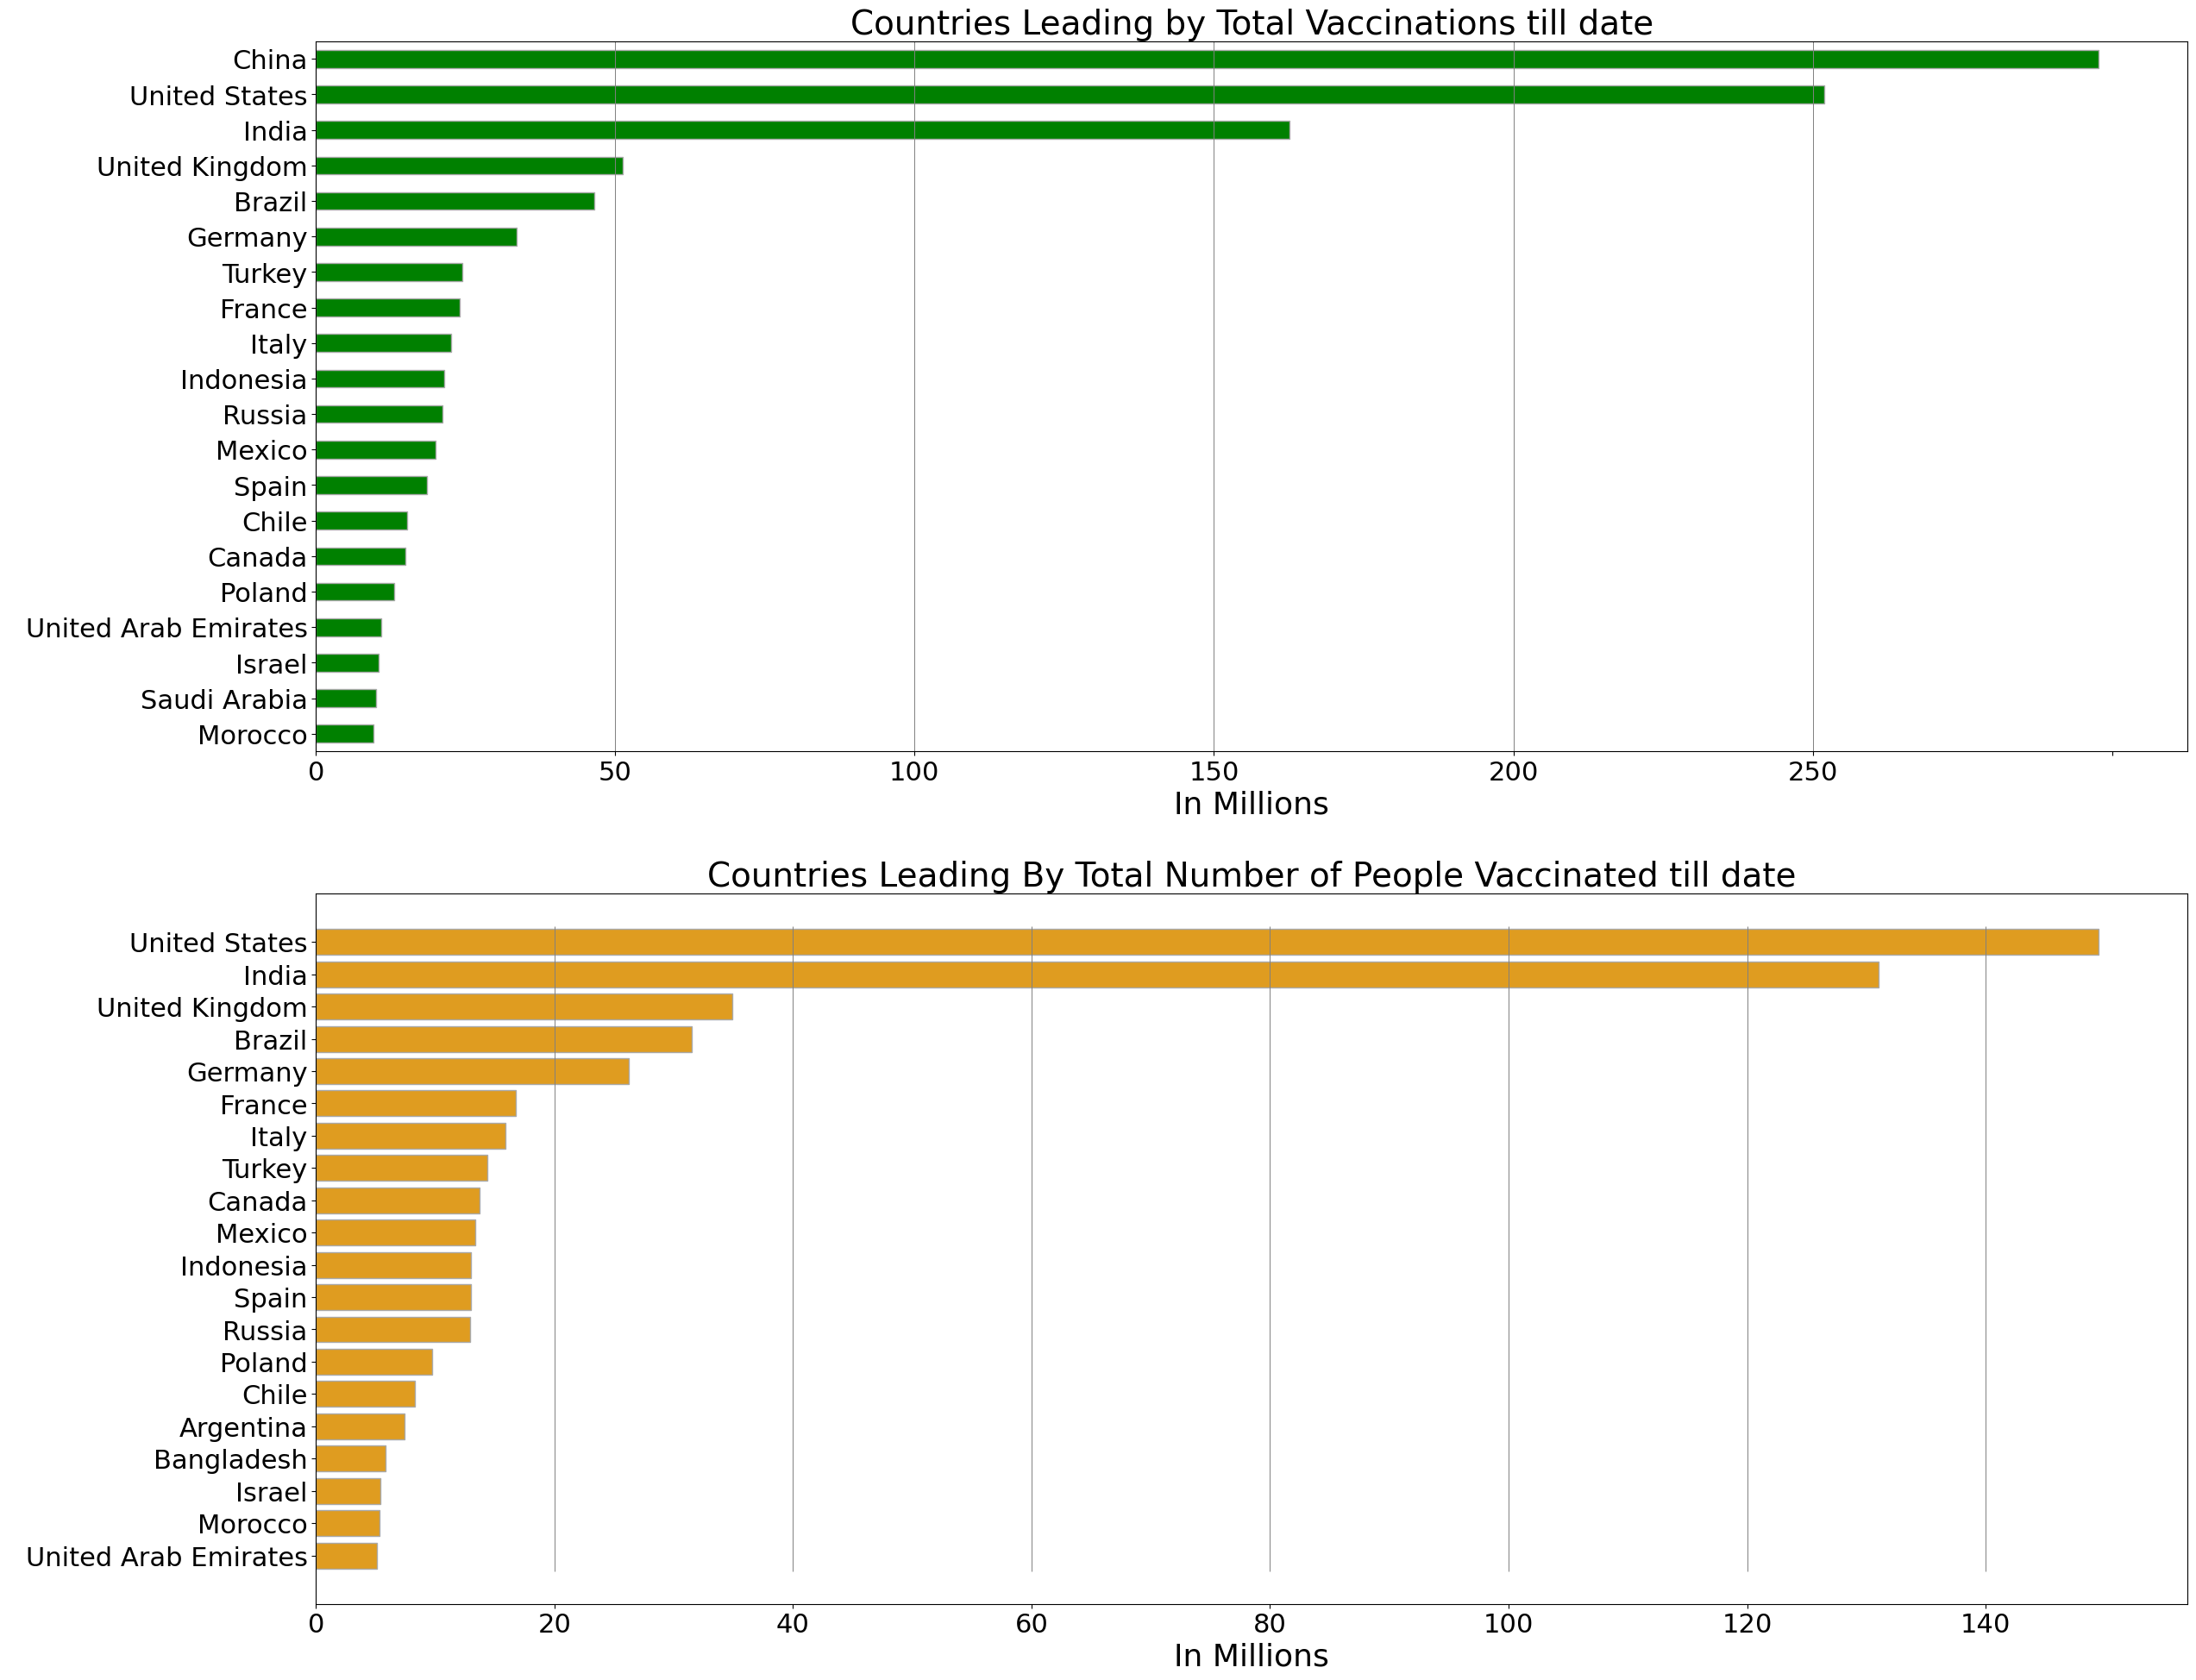

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=2, dpi=100, figsize=(28,24))

LeadCountries = CovidVacc.groupby(['country'])['total_vaccinations'].max().sort_values(ascending = False).head(20)
LeadCountries.sort_values(ascending = True).plot(kind = 'barh',
                                               ax=ax[0],color='green', edgecolor='darkgrey')
ax[0].tick_params(axis='y', labelsize=22)
ax[0].set_xticklabels([0,50,100,150,200, 250], fontsize=22)
ax[0].set_ylabel(" ")
for label in ax[0].yaxis.get_ticklabels():
            label.wrap=True

ax[0].set_xlabel("In Millions", fontsize = 26)
Ystart, Yend = ax[0].get_ylim()
ax[0].vlines(x=[50e6,100e6,150e6,200e6,250e6],
             ymin=Ystart, ymax=Yend,  color='gray', linewidth = 0.7)
ax[0].set_title("Countries Leading by Total Vaccinations till date", fontsize=28)

############ Country leading by Total number of people vaccinated####################


LeadPeople = CovidVacc.groupby(['country'])['people_vaccinated'].max().sort_values(ascending = False).head(20)
LeadPeople.sort_values(ascending = True)
sns.barplot(x=LeadPeople.values, y=LeadPeople.index,
            ax=ax[1], color= 'orange', edgecolor='darkgrey')
ax[1].tick_params(axis='y', labelsize=22)
ax[1].set_xticklabels([0,20,40,60,80,100,120,140], fontsize=22)
ax[1].set_ylabel(" ")
ax[1].set_xlabel("In Millions",fontsize = 26)
for label in ax[1].yaxis.get_ticklabels():
            label.wrap=True
Ystart, Yend = ax[1].get_ylim()
ax[1].vlines(x=[20e6,40e6,60e6,80e6,100e6, 120e6,140e6],
             ymin=Ystart, ymax=Yend,  color='gray', linewidth = 0.7)
ax[1].set_title("Countries Leading By Total Number of People Vaccinated till date", fontsize=28)

plt.show()


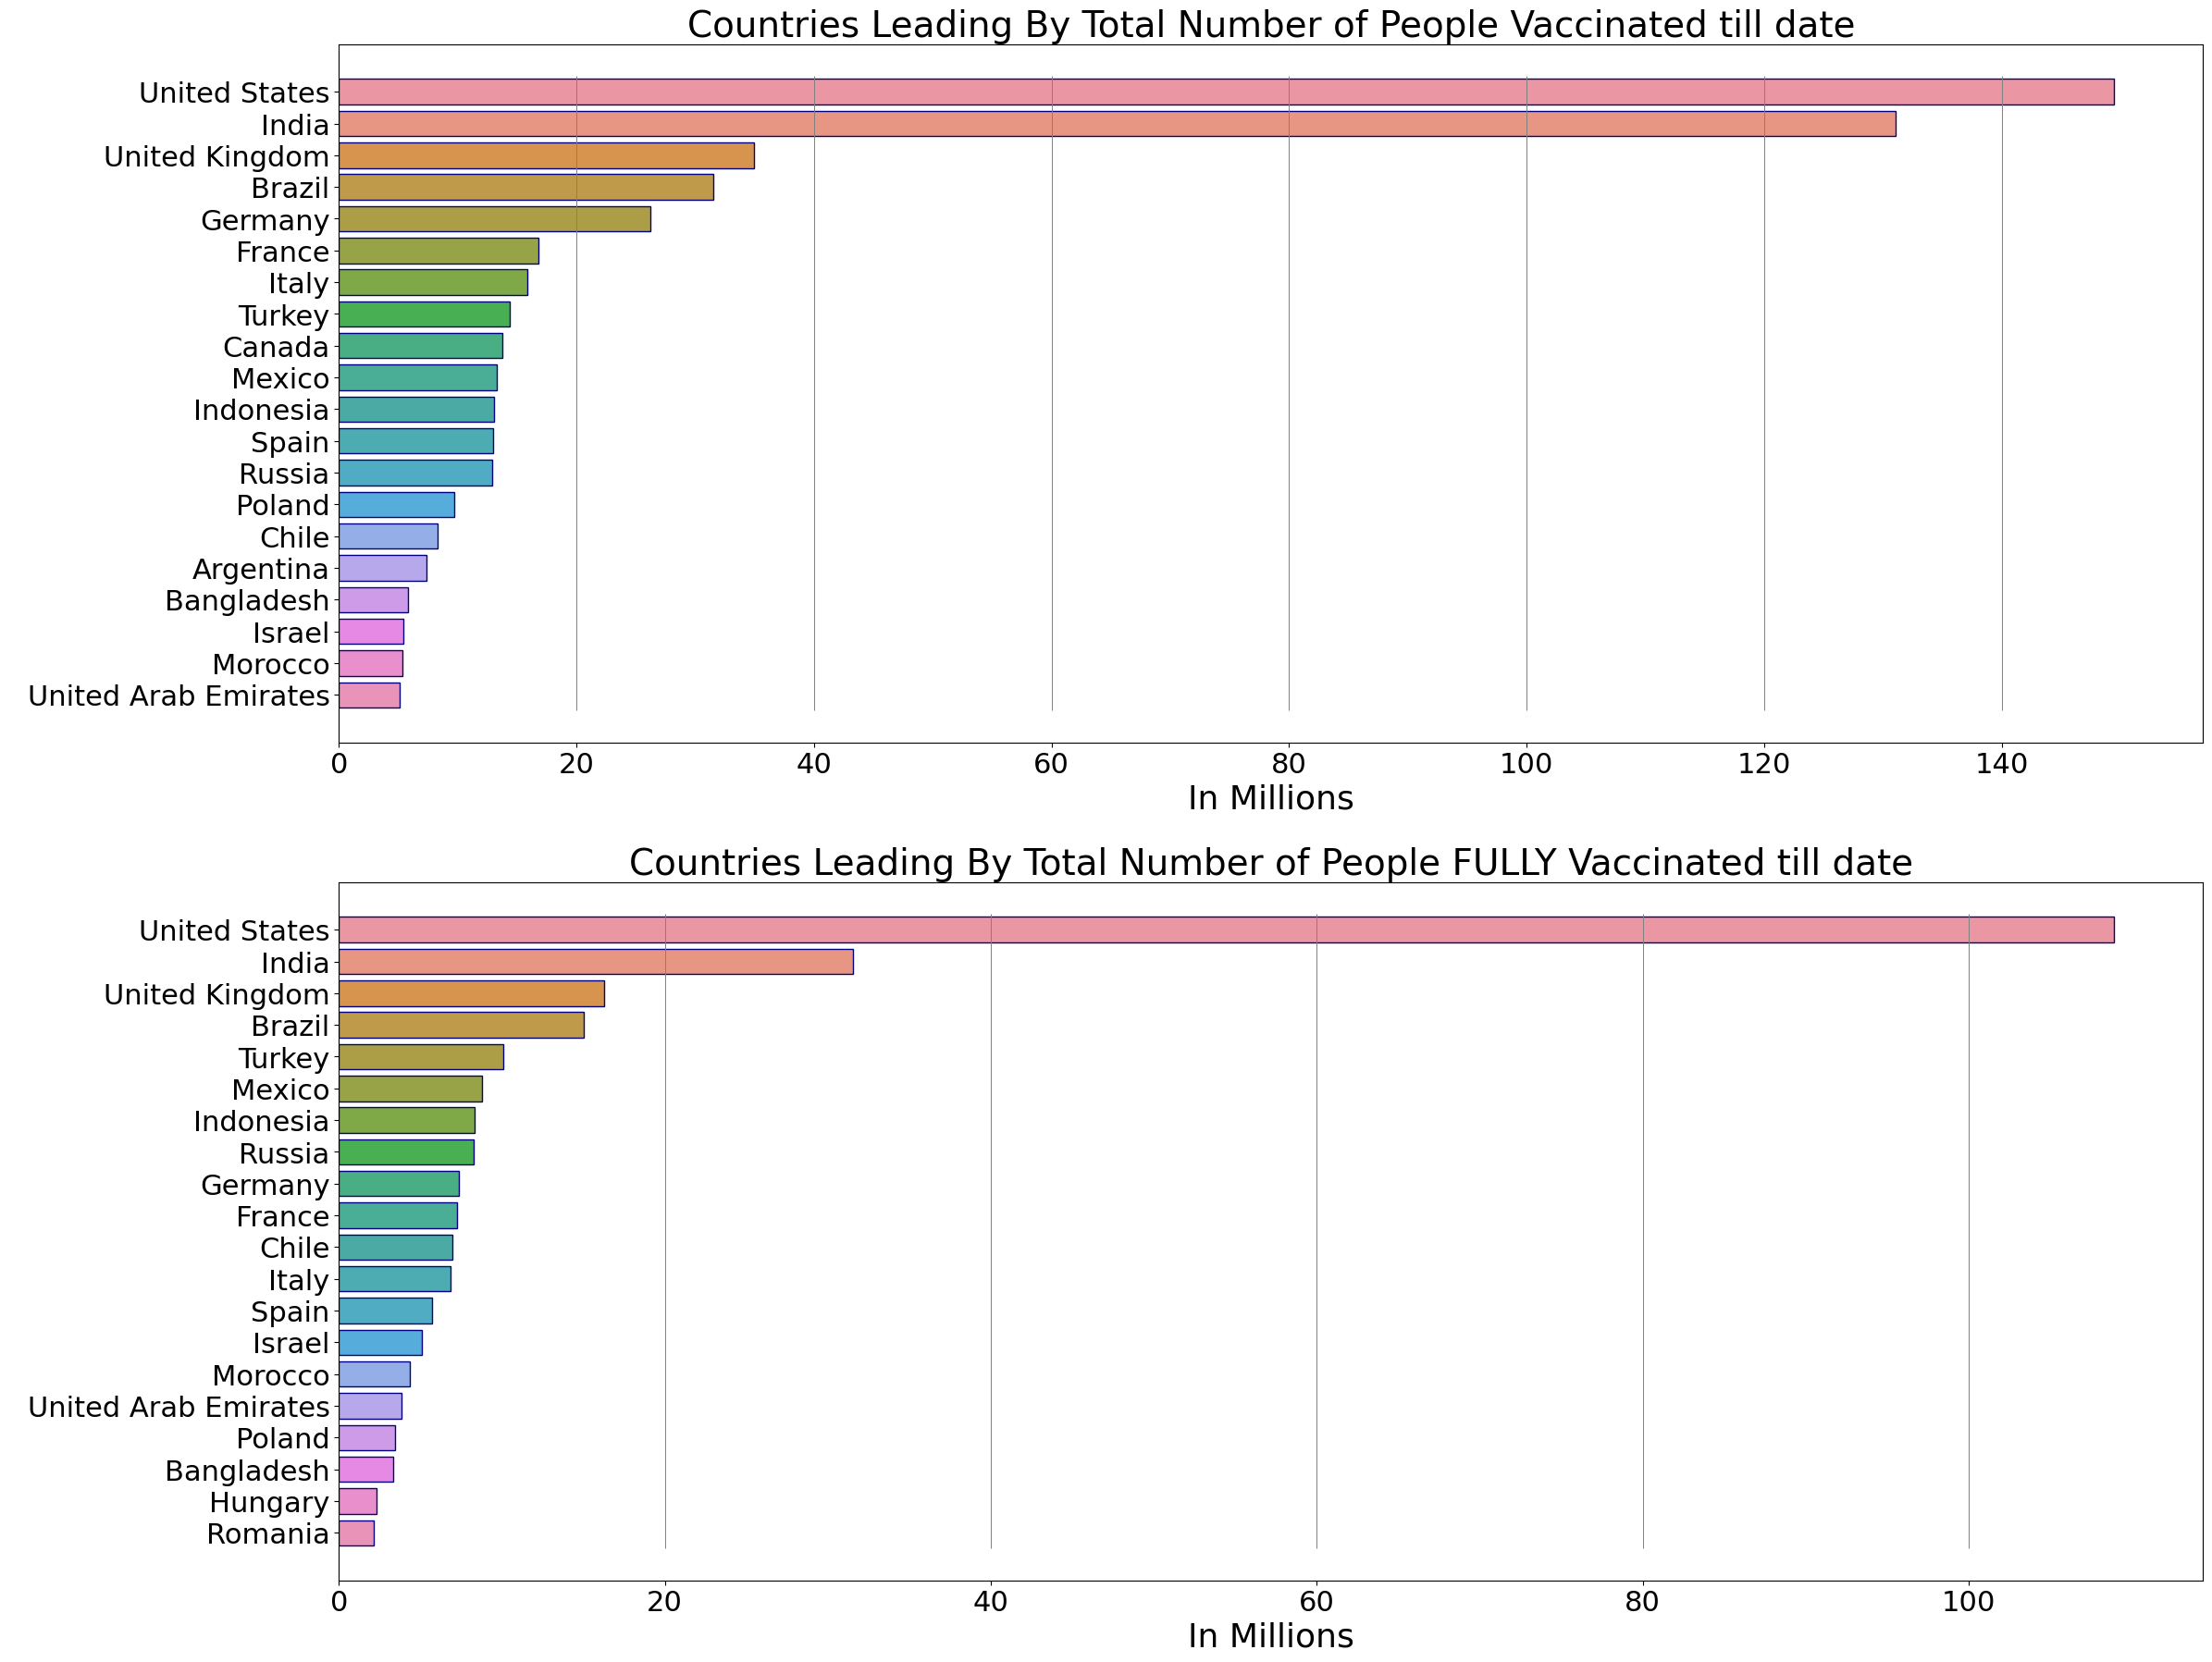

In [8]:
################# Country leading by Total number of people vaccinated###################

fig, ax = plt.subplots(ncols=1, nrows=2, dpi=100, figsize=(26,22))

LeadPeople = CovidVacc.groupby(['country'])['people_vaccinated'].max().sort_values(ascending = False).head(20)

sns.barplot(x=LeadPeople.values, y=LeadPeople.index, edgecolor='navy', ax=ax[0])
ax[0].tick_params(axis='y', labelsize=22)
ax[0].set_xticklabels([0,20,40,60,80,100,120,140], fontsize=22)
ax[0].set_ylabel(" ")
ax[0].set_xlabel("In Millions",fontsize = 26)
for label in ax[0].yaxis.get_ticklabels():
            label.wrap=True
Ystart, Yend = ax[0].get_ylim()
ax[0].vlines(x=[20e6,40e6,60e6,80e6,100e6, 120e6,140e6], ymin=Ystart, ymax=Yend,  color='gray', linewidth = 0.7)
ax[0].set_title("Countries Leading By Total Number of People Vaccinated till date", fontsize=28)


#############################################Total number of people FULLY vaccinated####################################

LeadFulPeople = CovidVacc.groupby(['country'])['people_fully_vaccinated'].max().sort_values(ascending = False).head(20)

sns.barplot(x=LeadFulPeople.values, y=LeadFulPeople.index, edgecolor='navy', ax=ax[1])
ax[1].tick_params(axis='y', labelsize=22)
ax[1].set_xticklabels([0,20,40,60,80,100], fontsize=22)
ax[1].set_ylabel(" ")
#for label in ax[1].yaxis.get_ticklabels():
            #label.wrap=True

ax[1].set_xlabel("In Millions", fontsize = 26)
Ystart, Yend = ax[1].get_ylim()
ax[1].vlines(x=[20e6,40e6,60e6,80e6,100e6], ymin=Ystart, ymax=Yend,  color='gray', linewidth = 0.7)
ax[1].set_title("Countries Leading By Total Number of People FULLY Vaccinated till date", fontsize=28)


plt.show()

Looking at the Daily Vaccination Trend of , United States, India, United Kingdom, Brazil, Turkey


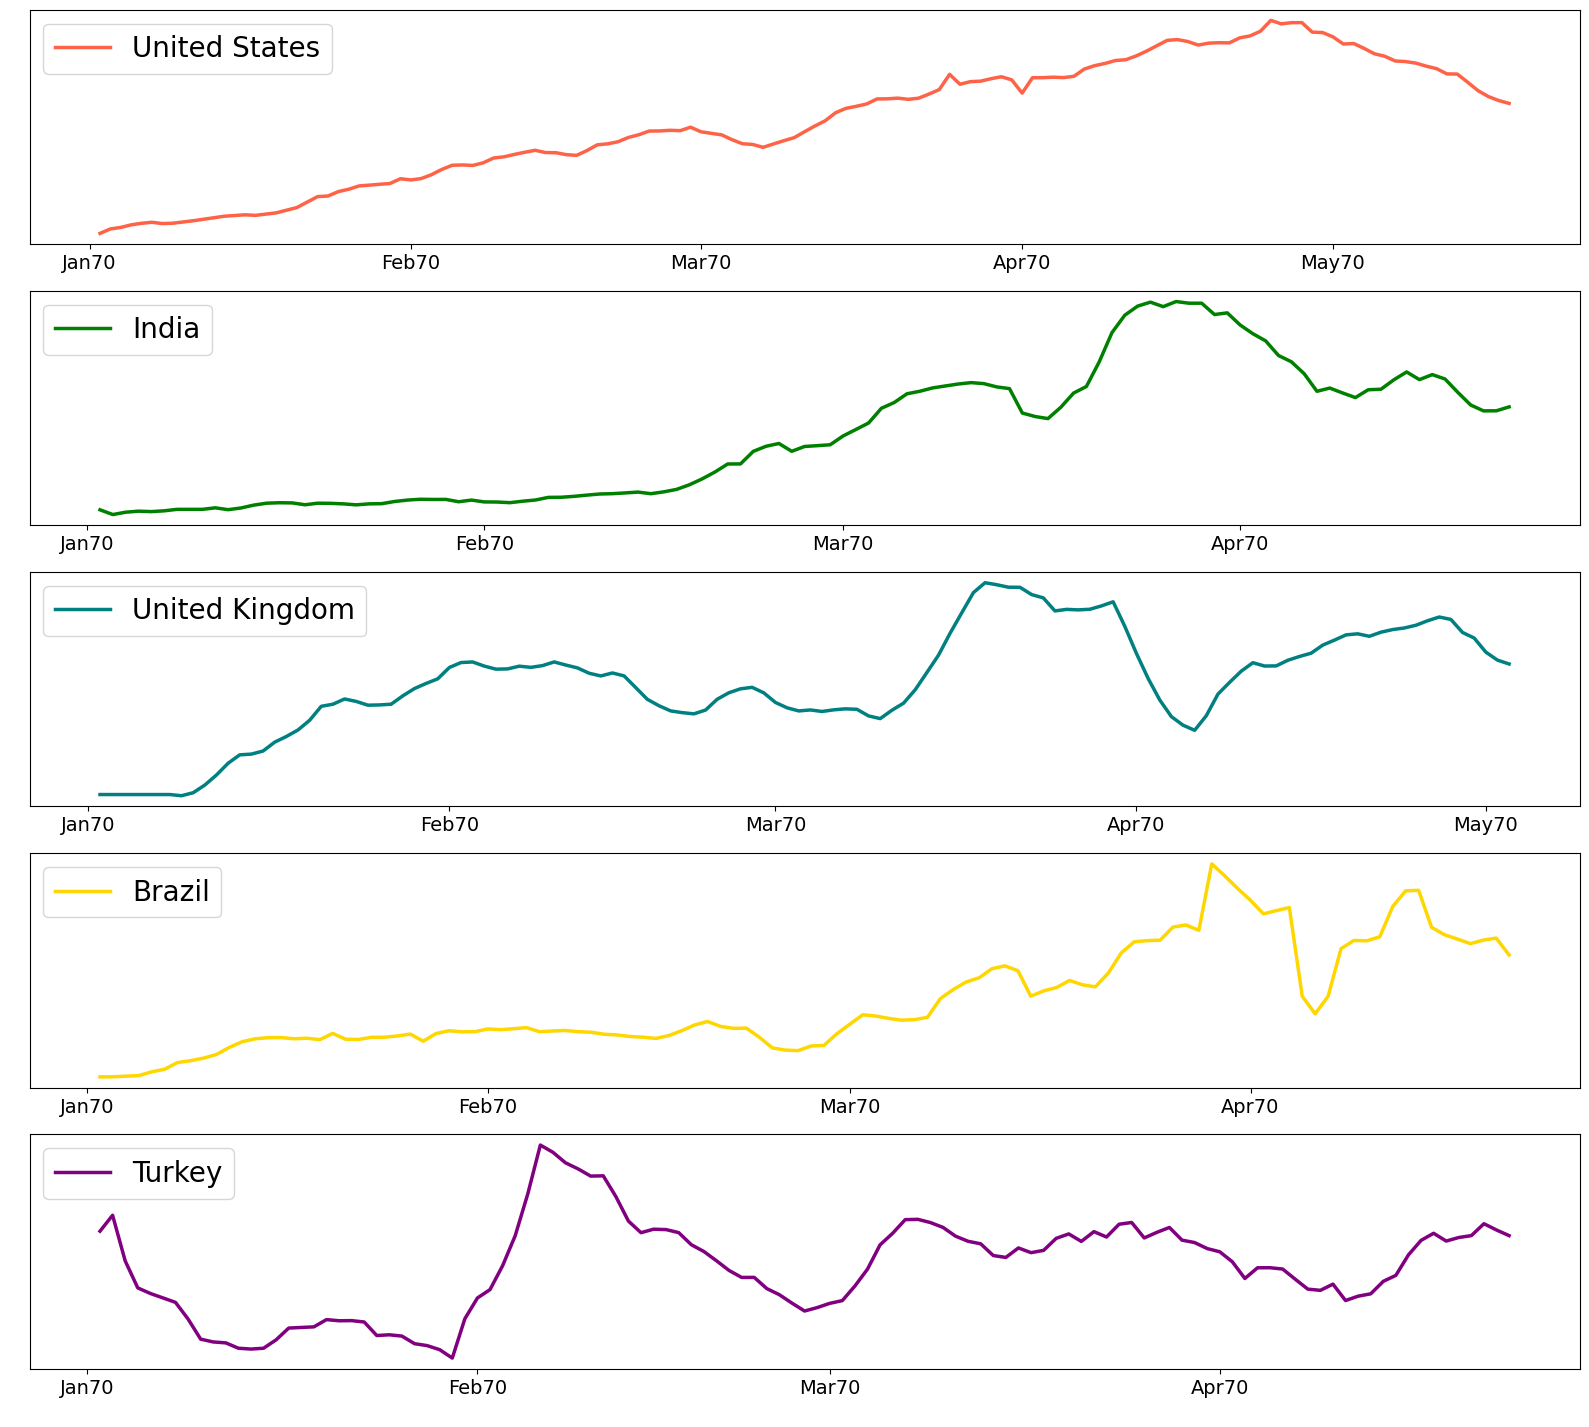

In [9]:
############## Daily vaccination Trend of Top 5 Countries leading in Total Number of People Vaccinated####################
 
print("Looking at the Daily Vaccination Trend of ", *LeadFulPeople.index[0:5], sep = ", ")
col = ['tomato','green','teal' , 'gold',  'purple']

fig, ax = plt.subplots(ncols=1, nrows=5, dpi=100, figsize=(20,18))

for i in range(len(LeadFulPeople.index[0:5])):
    DailyVacc = CovidVacc[CovidVacc['country'] == LeadFulPeople.index[i]]
    sns.lineplot(data = DailyVacc, x='date', y='daily_vaccinations', linewidth=2.5, ax=ax[i],
                 label=LeadFulPeople.index[i], color=col[i])
    
    ax[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[i].xaxis.set_major_formatter(DateFormatter('%b%y'))
    ax[i].legend(prop={'size': 20}, loc='upper left')
    #Xstart, Xend = ax[i].get_xlim()
    #Ystep = round((Yend-Ystart)/5, 2)
    #ax[i].hlines(y=[2*Ystep, 4*Ystep], xmin=Xstart, xmax=Xend,  color='gray', linewidth = 0.7)
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_yticks([])
    ax[i].tick_params(axis='x', labelsize=14)
    
    
plt.show()

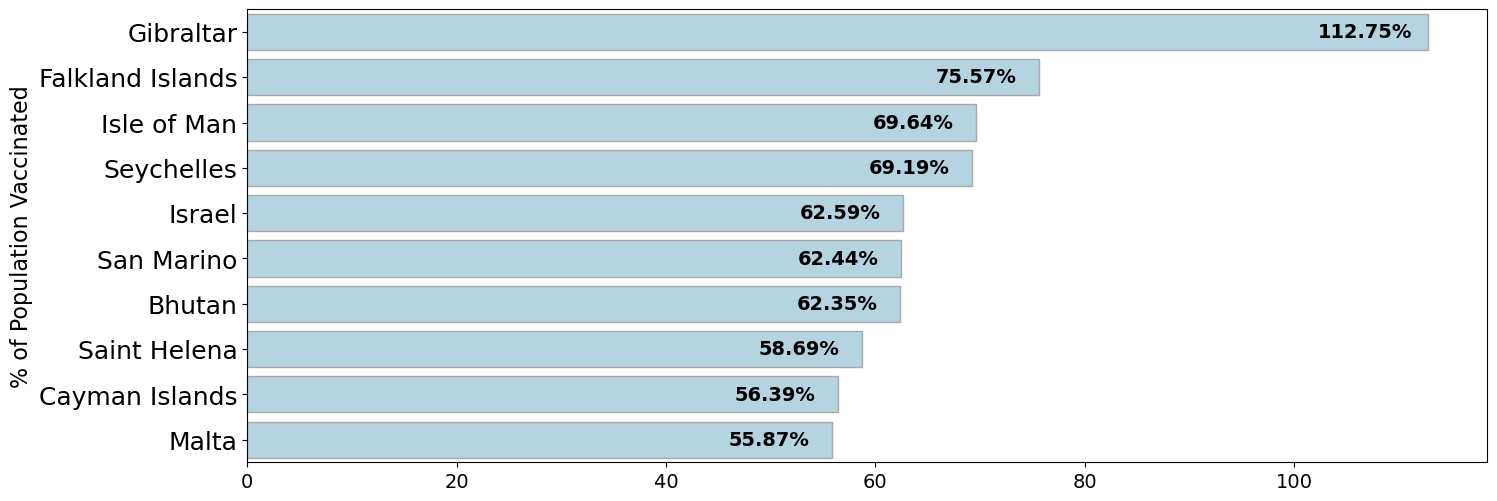

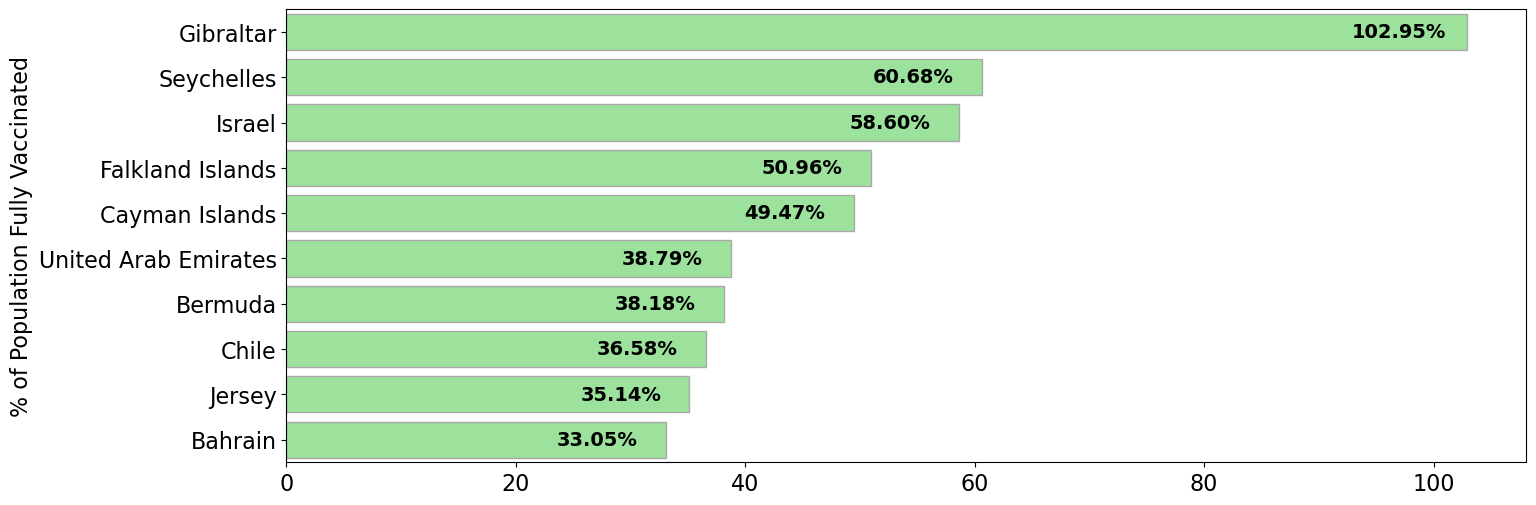

In [10]:
################# Total number of people vaccinated per hundred #####################
############# Ratio (in percent) between population immunized and ###################
##################total population up to the date in the country #####################
####################### i.e % of population vaccinated ##############################

PopVaccinated = CovidVacc.groupby(['country'])['people_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

PopFullyVaccinated = CovidVacc.groupby(['country'])['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

fig, ax = plt.subplots(ncols=1, nrows=1, dpi=100, figsize=(16,6))

sns.barplot(x=PopVaccinated.values, y=PopVaccinated.index, color='lightblue',
            edgecolor='darkgrey', ax=ax)
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width()-6, p.get_y()+0.50*p.get_height(),
            '{:1.2f}%'.format(width), fontsize=14,
             ha='center', va='center', color='black', fontweight='bold')
ax.set_ylabel('% of Population Vaccinated', fontsize = 16)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=14)

fig, ax = plt.subplots(ncols=1, nrows=1, dpi=100, figsize=(16,6))
sns.barplot(x=PopFullyVaccinated.values, y=PopFullyVaccinated.index,
            color='lightgreen', edgecolor='darkgrey', ax=ax)
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width()-6, p.get_y()+0.50*p.get_height(),
            '{:1.2f}%'.format(width), fontsize=14,
             ha='center', va='center', color='black', fontweight='bold')
ax.set_ylabel('% of Population Fully Vaccinated', fontsize = 16)
ax.tick_params(axis='both', labelsize=16)

Looking at the Daily Vaccination Trend of , United States, India, United Kingdom, Brazil, Germany


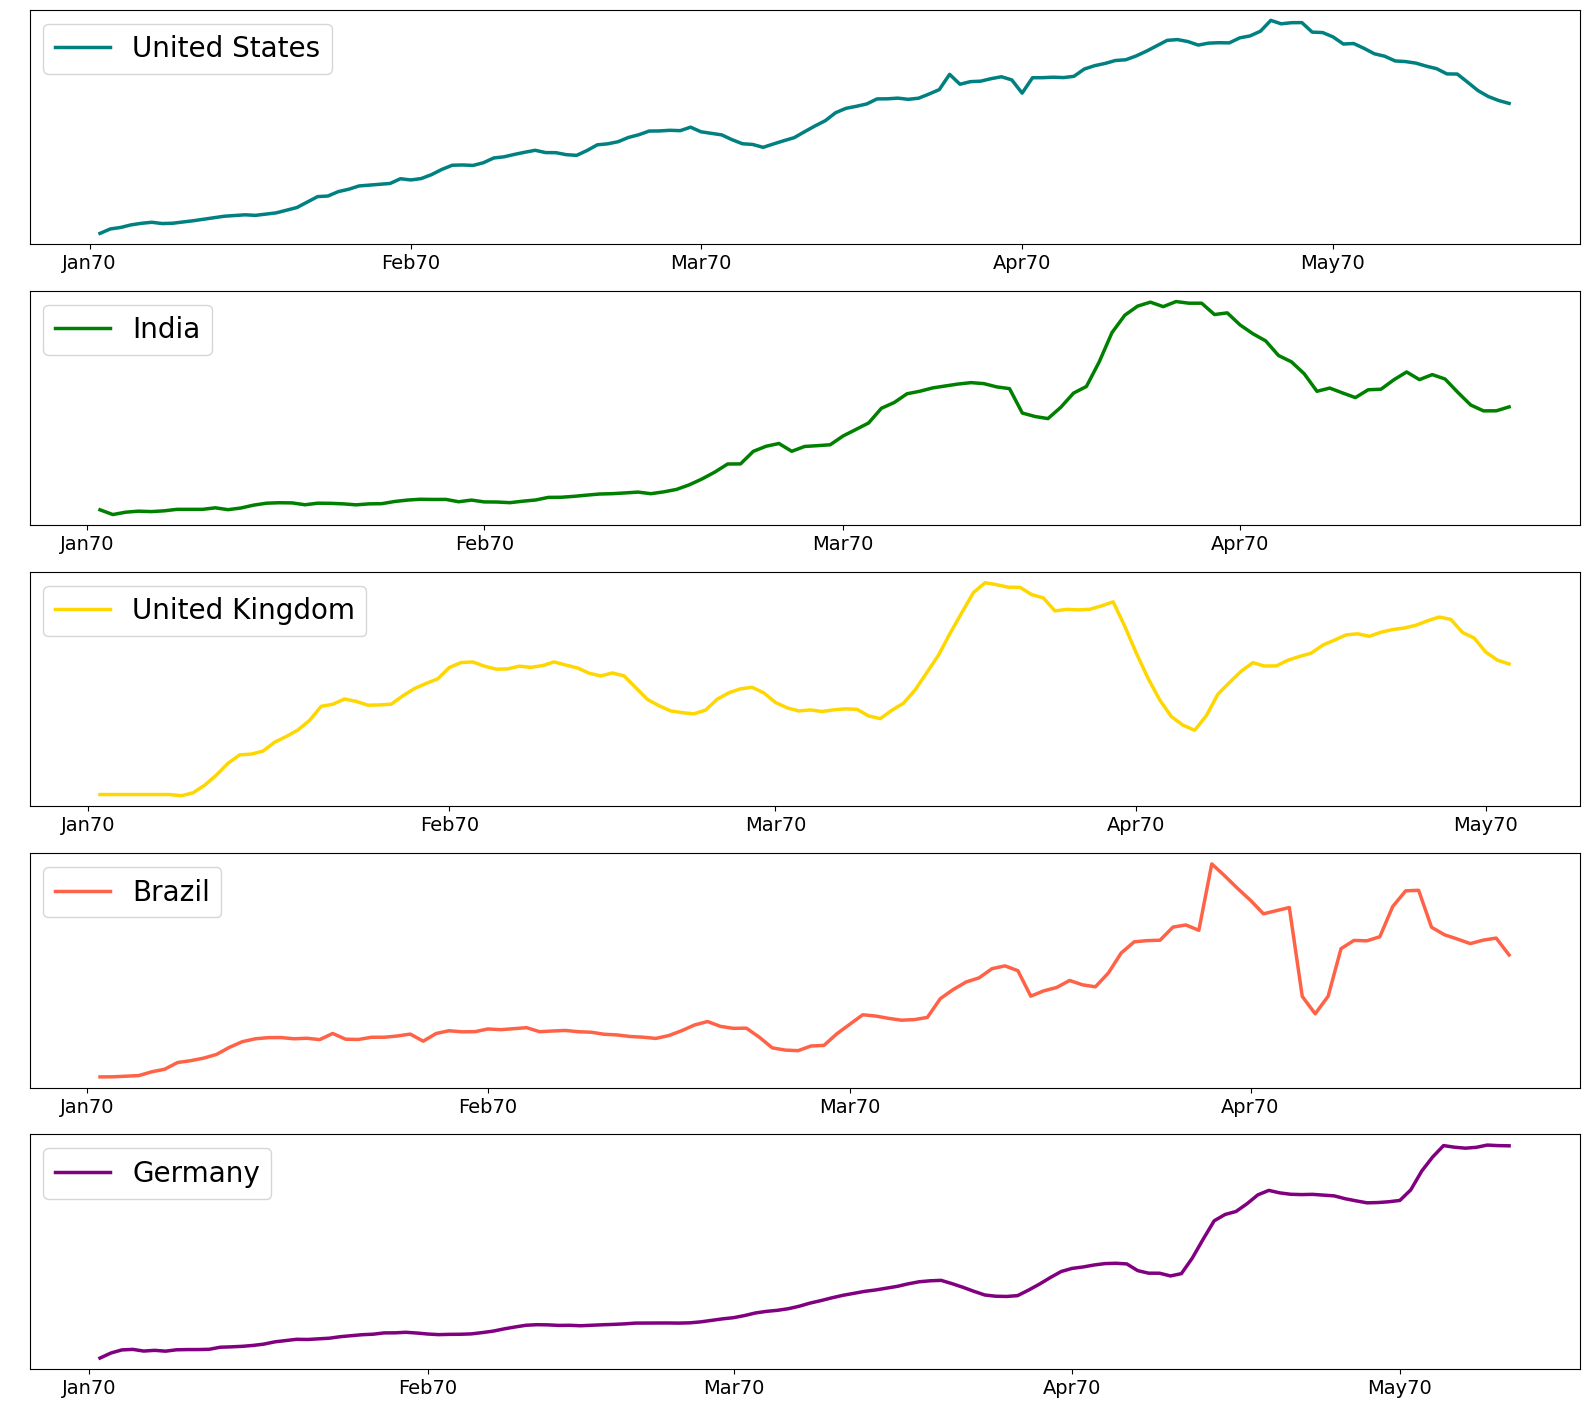

In [15]:
############## Daily vaccination Trend of Top 5 Countries leading in Total Number of People Vaccinated####################
 
print("Looking at the Daily Vaccination Trend of ", *LeadPeople.index[0:5], sep = ", ")
col = ['teal', 'green', 'gold', 'tomato', 'purple']

fig, ax = plt.subplots(ncols=1, nrows=5, dpi=100, figsize=(20,18))

for i in range(len(LeadPeople.index[0:5])):
    DailyVacc = CovidVacc[CovidVacc['country'] == LeadPeople.index[i]]
    sns.lineplot(data = DailyVacc, x='date', y='daily_vaccinations', linewidth=2.5, ax=ax[i],
                 label=LeadPeople.index[i], color=col[i])
    
    ax[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[i].xaxis.set_major_formatter(DateFormatter('%b%y'))
    ax[i].legend(prop={'size': 20}, loc='upper left')
    #Xstart, Xend = ax[i].get_xlim()
    #Ystep = round((Yend-Ystart)/5, 2)
    #ax[i].hlines(y=[2*Ystep, 4*Ystep], xmin=Xstart, xmax=Xend,  color='gray', linewidth = 0.7)
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_yticks([])
    ax[i].tick_params(axis='x', labelsize=14)
    
    
plt.show()

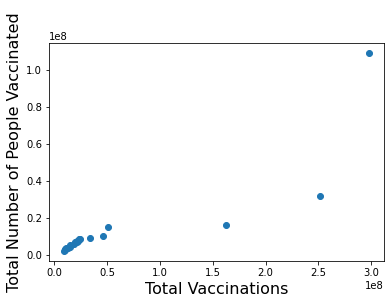

In [16]:
plt.scatter(LeadCountries, LeadFulPeople)
plt.xlabel("Total Vaccinations", fontsize=16)
plt.ylabel(" Total Number of People Vaccinated ", fontsize =16)
plt.show()




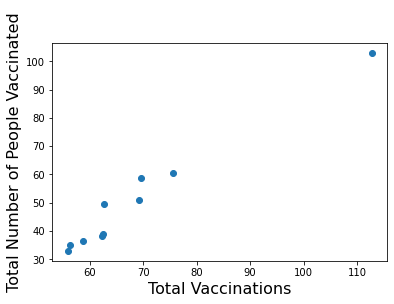

In [17]:
plt.scatter(PopVaccinated, PopFullyVaccinated)
plt.xlabel("Total Vaccinations", fontsize=16)
plt.ylabel(" Total Number of People Vaccinated ", fontsize =16)
plt.show()

In [18]:
VaccMan = pd.read_csv('Desktop/country_vaccinations_by_manufacturer.csv')
VaccMan.shape

(3491, 4)

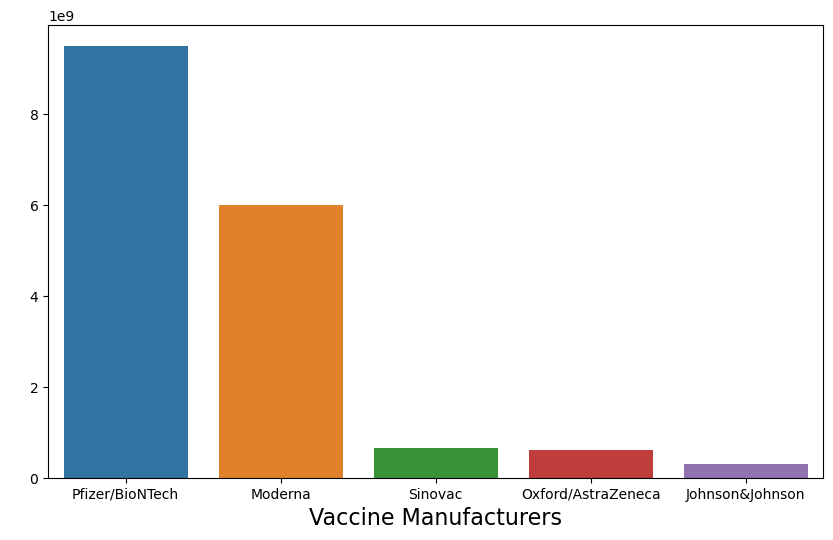

In [19]:
Vacc = VaccMan.groupby('vaccine').sum().sort_values(by=['total_vaccinations'], ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (10,6))

sns.barplot(x=Vacc.index, y=Vacc['total_vaccinations'], ax=ax)
ax.set_xlabel("Vaccine Manufacturers", fontsize = 16)
ax.set_ylabel(" ")

plt.show()


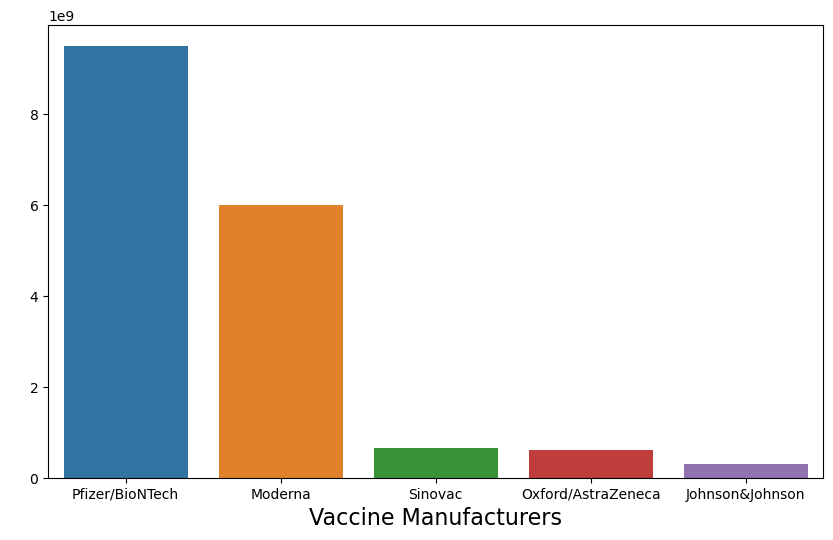

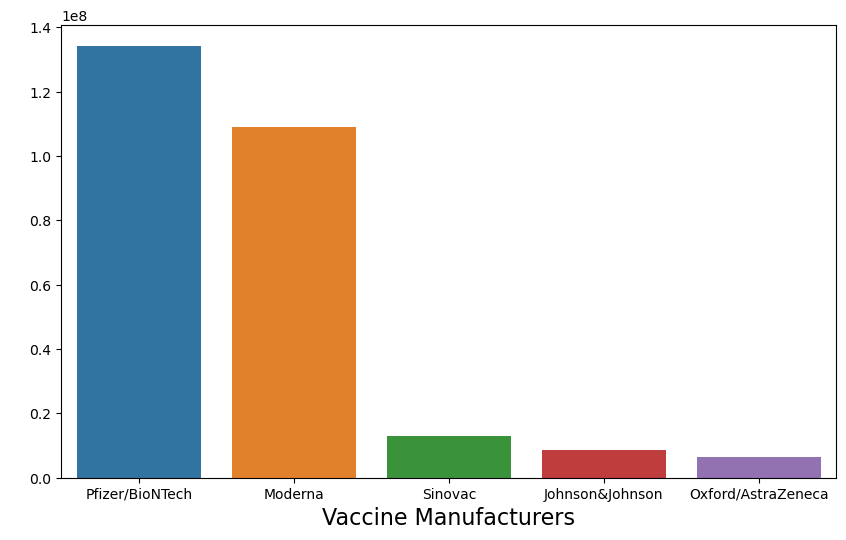

In [20]:

Vacc = VaccMan.groupby('vaccine').sum().sort_values(by=['total_vaccinations'], ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (10,6))

sns.barplot(x=Vacc.index, y=Vacc['total_vaccinations'], ax=ax)
ax.set_xlabel("Vaccine Manufacturers", fontsize = 16)
ax.set_ylabel(" ")

Vaccmax = VaccMan.groupby(['vaccine'])['total_vaccinations'].max().sort_values(ascending=False).head(20)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (10,6))

sns.barplot(x=Vaccmax.index, y=Vaccmax.values, ax=ax)
ax.set_xlabel("Vaccine Manufacturers", fontsize = 16)
ax.set_ylabel(" ")

plt.show()